In [1]:
'''Functions for drawing contours of Dirichlet distributions.'''

# Author: Thomas Boggs
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)



Populating the interactive namespace from numpy and matplotlib


Wrote plots to "dirichlet_plots.png".


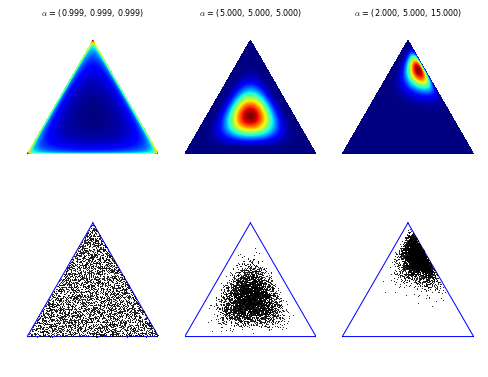

In [3]:
if __name__ == '__main__':
    f = plt.figure(figsize=(8, 6))
    alphas = [[0.999] * 3,
              [5] * 3,
              [2, 5, 15]]
    for (i, alpha) in enumerate(alphas):
        plt.subplot(2, len(alphas), i + 1)
        dist = Dirichlet(alpha)
        draw_pdf_contours(dist)
        title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
        plt.title(title, fontdict={'fontsize': 8})
        plt.subplot(2, len(alphas), i + 1 + len(alphas))
        plot_points(dist.sample(5000))
    plt.savefig('dirichlet_plots.png')
    print 'Wrote plots to "dirichlet_plots.png".'

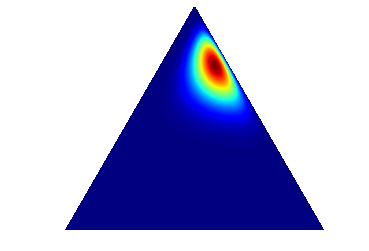

In [4]:
draw_pdf_contours(Dirichlet([2, 5, 15]))

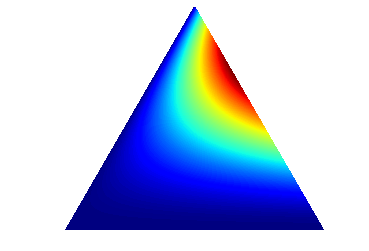

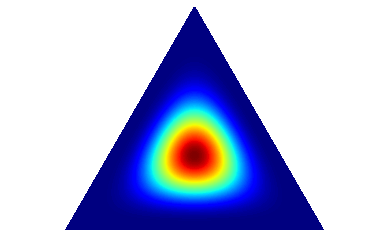

In [8]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

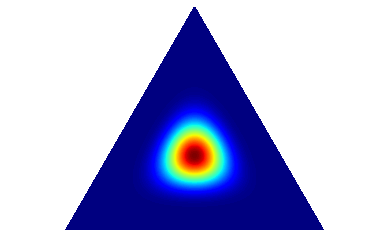

In [9]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

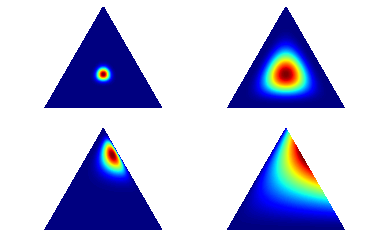

In [13]:
plt.hold(True)
plt.subplot(2,2,1)
draw_pdf_contours(Dirichlet([50, 50, 50]))
plt.subplot(2,2,2)
draw_pdf_contours(Dirichlet([5, 5, 5]))
plt.subplot(2,2,3)
draw_pdf_contours(Dirichlet([2, 5, 15]))
plt.subplot(2,2,4)
draw_pdf_contours(Dirichlet([1, 1.8, 3]))
savefig('dirchlet.jpg')